# 06 - Wizualizacja z `seaborn`

## W tym rozdziale

- Wprowadzenie do `seaborn`. 
- Zastosowanie `seaborn` w praktyce:
  - **Wykresy jednowymiarowe** (histogramy).  
  - **Dwuwymiarowe wykresy ciągłe** (scatterplots i wykresy liniowe).
  - **Dwuwymiarowe wykresy kategoryczne** (wykresy słupkowe, wykresy pudełkowe i wykresy paskowe).

## Wprowadzenie do `seaborn`

### Czym jest `seaborn`?

> [`seaborn`](https://seaborn.pydata.org/) jest pakietem do wizualizacji danych opartym na `matplotlib`.

- Ogólnie rzecz biorąc, łatwiej jest tworzyć ładnie wyglądające wykresy z `seaborn`.
- Kompromisem jest to, że `matplotlib` oferuje większą elastyczność.

In [1]:
import seaborn as sns ### ładowanie seaborn
import pandas as pd
import matplotlib.pyplot as plt ## gdyby był potrzebny
import numpy as np

In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

### Hierarchia typów wykresów w `seaborn`

W tym rozdziale (i w następnym) dowiemy się więcej o tym, co dokładnie oznacza ta hierarchia.

![title](img/seaborn_library.png)

### Przykładowe dane

Tutaj zaczerpniemy z [Gapminder](https://www.gapminder.org/data/documentation/). 

- **Gapminder** to niezależna szwedzka fundacja zajmująca się publikowaniem i analizowaniem danych w celu korygowania błędnych przekonań na temat świata.
- W latach 1952-2007 posiadała dane na temat `life_exp`, `gdp_cap` i `population`.

In [3]:
df_gapminder = pd.read_csv("data/viz/gapminder_full.csv")

In [95]:
df_gapminder.head(5)

,country,year,population,continent,life_exp,gdp_cap,gdp_cap_log
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,2.891786
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,2.914265
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,2.931000
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,2.922309
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,2.869221


In [5]:
df_gapminder.shape

(1704, 6)

## Wykresy jednowymiarowe

> Wykres **jednowymiarowy** jest wizualizacją tylko *jednej* zmiennej, tj. jej **rozkładu**.

![title](img/displot.png)

### Histogramy z `sns.histplot`

- Poprzednio rysowaliśmy histogramy z `plt.hist`.  
- Z `seaborn`, mozemy uzyć `sns.histplot(...)`.

Zamiast `df['col_name']`, wykorzystujemy składnię:

```python
sns.histplot(data = dane, x = nazwa_zmiennej)
```

Stanie się to jeszcze bardziej przydatne, gdy zaczniemy tworzyć **wykresy dwuwymiarowe**.

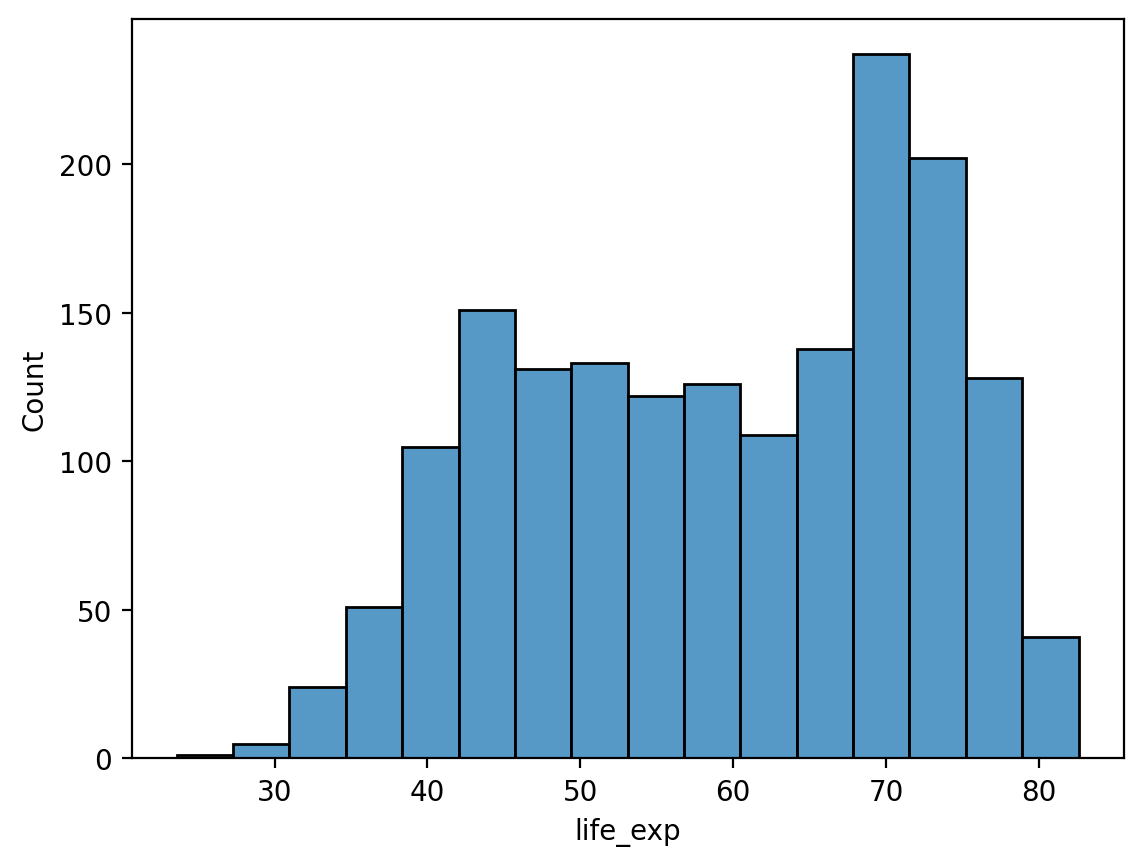

In [6]:
# Histogram oczekiwanej długości zycia
sns.histplot(df_gapminder['life_exp']);

#### Modyfikowanie liczby przedziałów

Podobnie jak w przypadku `plt.hist`, możemy modyfikować liczbę *przedziałów*.

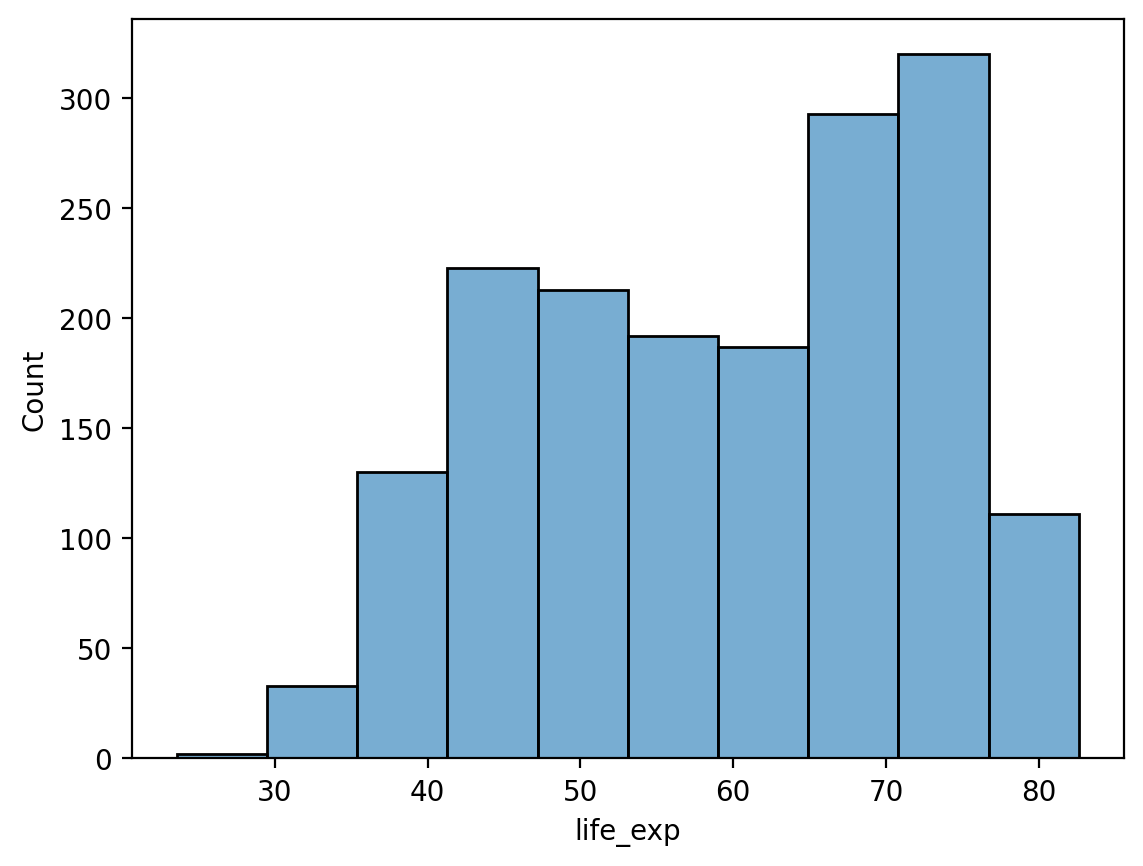

In [7]:
# Mniej przedziałów
sns.histplot(data = df_gapminder, x = 'life_exp', bins = 10, alpha = .6);

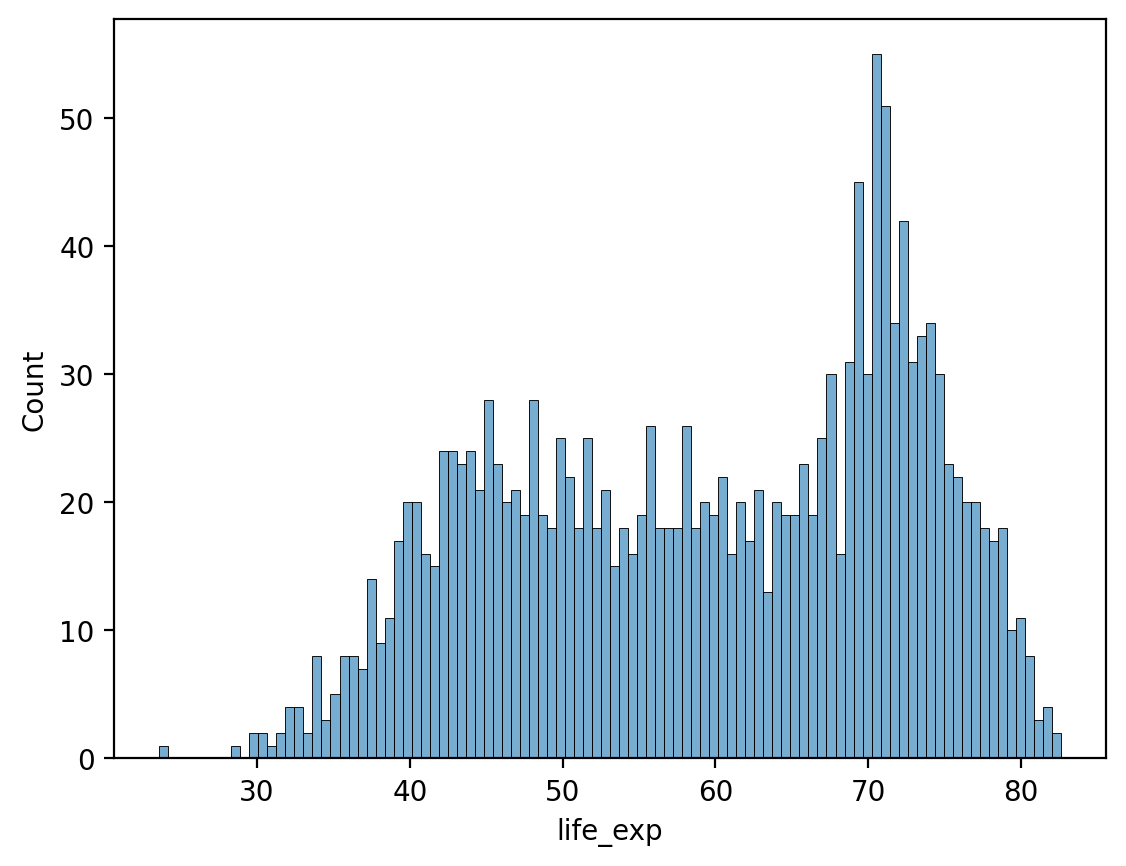

In [8]:
# Więcej przedziałów!
sns.histplot(data = df_gapminder, x = 'life_exp', bins = 100, alpha = .6);

#### Modyfikacje osi-y z `stat`

Domyślnie, `sns.histplot` wykreśli **liczebność** każdej kategorii. Możemy to jednak zmienić za pomocą parametru `stat`:

- `probability`: normalizuje tak, że wysokości słupków sumują się do `1`.
- `percent`: normalizuje tak, że wysokości słupków sumują się do `100`.
- `density`: normalizuje tak, że całkowita *area* sumuje się do `1`.


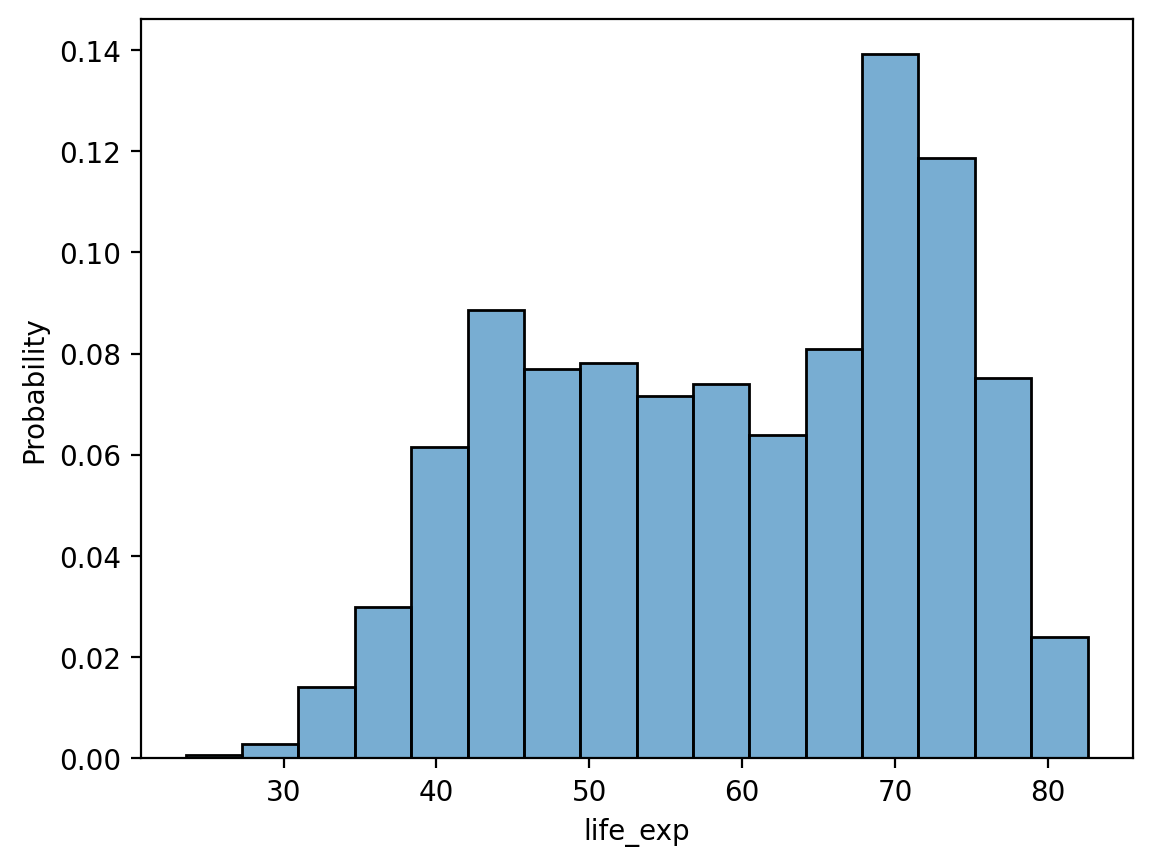

In [9]:
# Zwróć uwagę na zmodyfikowaną oś y!
sns.histplot(data = df_gapminder, x = 'life_exp', stat = "probability", alpha = .6);

### Sprawdź się!

Jak stworzyć histogram pokazujący rozkład wartości `population` w samym roku `2007`? 

- Zmodyfikuj ten wykres, aby pokazywał „prawdopodobieństwo”, a nie „liczbę”.
- Co widzimy na tym wykresie i jak mógł(a)byś go zmienić?

<Axes: xlabel='population', ylabel='Probability'>

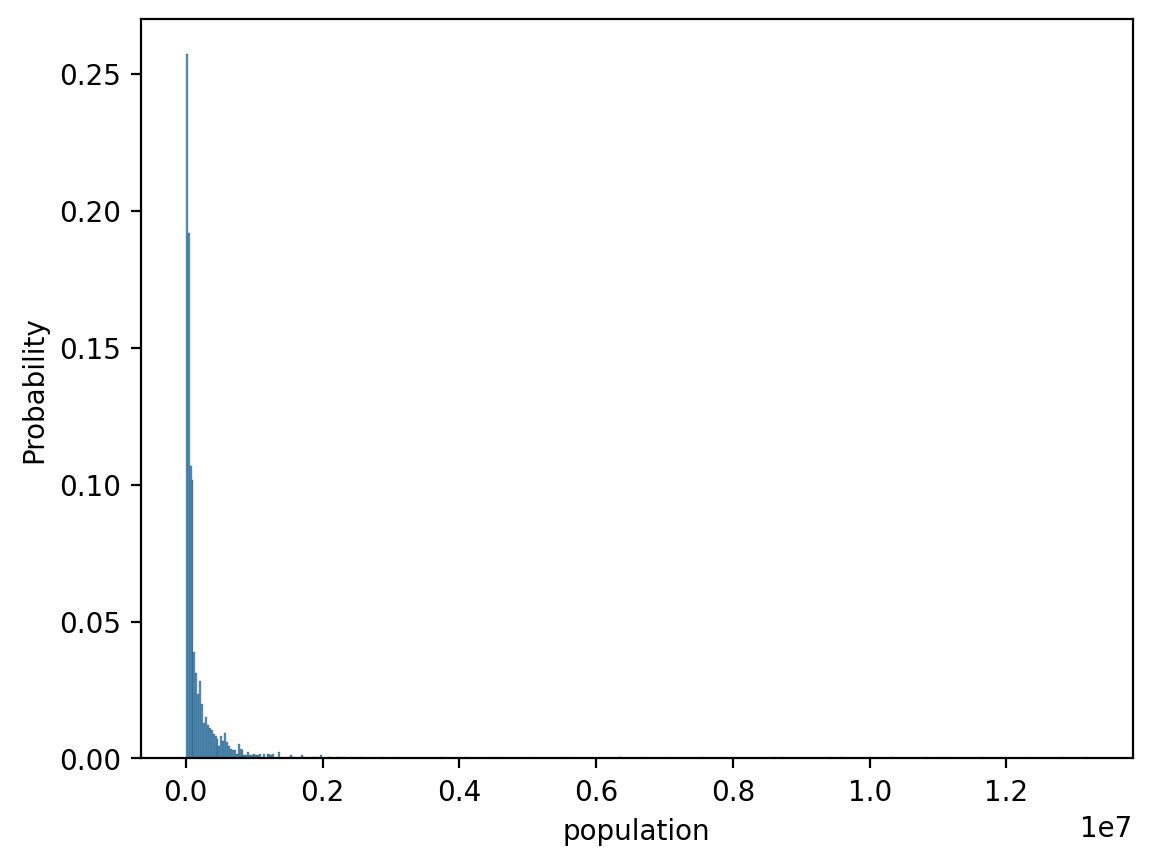

In [55]:
### Twój kod tutaj
population = df_gapminder.get("population") /100
sns.histplot(data=df_gapminder[df_gapminder['year'] == 2007], x=population, stat='probability')

## Ciągłe wykresy dwuwymiarowe

> Wykres **zmiennych ciągłych** wizualizuje związek między *dwoma zmiennymi ciągłymi*.

![title](img/seaborn_relplot.png)

### Wykresy rozrzutu z `sns.scatterplot`

> **Wykres rozrzutu** wizualizuje związek między dwiema zmiennymi ciągłymi.

- Każda obserwacja jest wykreślana jako pojedyncza kropka/znak. 
- Pozycja na osiach `(x, y)` odzwierciedla wartość tych zmiennych.

Jednym ze sposobów utworzenia scatterplot w `seaborn` jest użycie `sns.scatterplot`.

#### Zależność `gdp_cap` z `life_exp`

Czego dowiadujemy się o zmiennej `gdp_cap`?

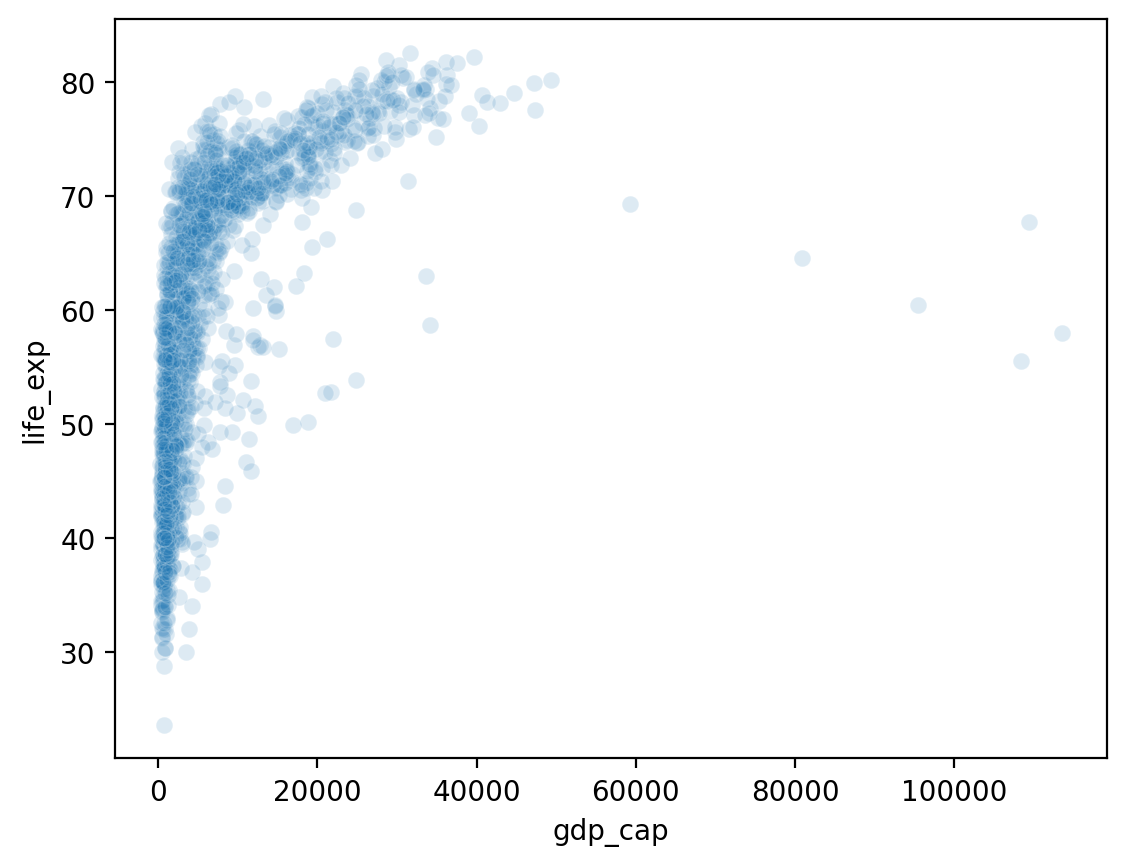

In [56]:
sns.scatterplot(data = df_gapminder, x = 'gdp_cap', y = 'life_exp', alpha = .15);

#### Zależność `gdp_cap_log` z `life_exp`

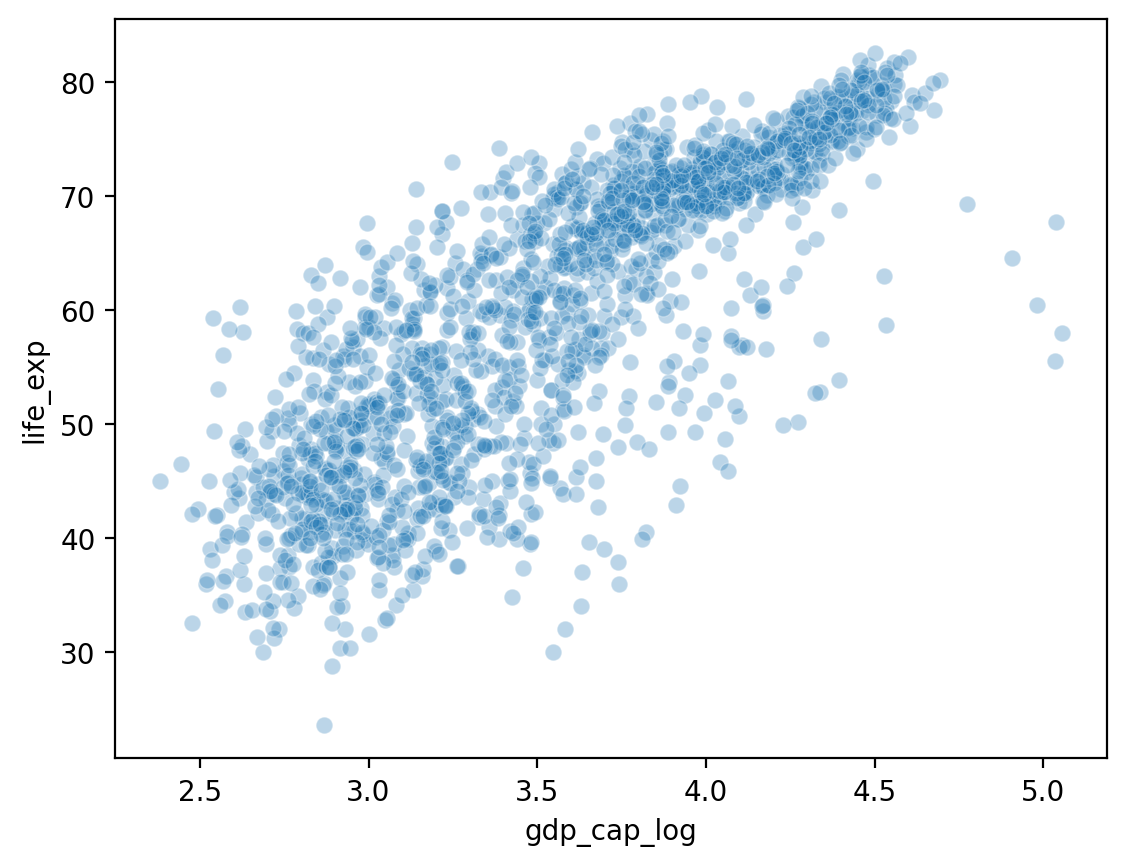

In [12]:
## Obliczamy i zapisujemy zmienną Log GDP
df_gapminder['gdp_cap_log'] = np.log10(df_gapminder['gdp_cap']) 
## Pokaż log GDP z life exp
sns.scatterplot(data = df_gapminder, x = 'gdp_cap_log', y = 'life_exp', alpha = .3);

#### Dodajemy `hue` - odcień

- Co jeśli chcemy dodać *trzeci* komponent, który jest kategoryczny, jak `continent`?
- `seaborn` pozwala nam to zrobić z `hue` - dodać odcienie.

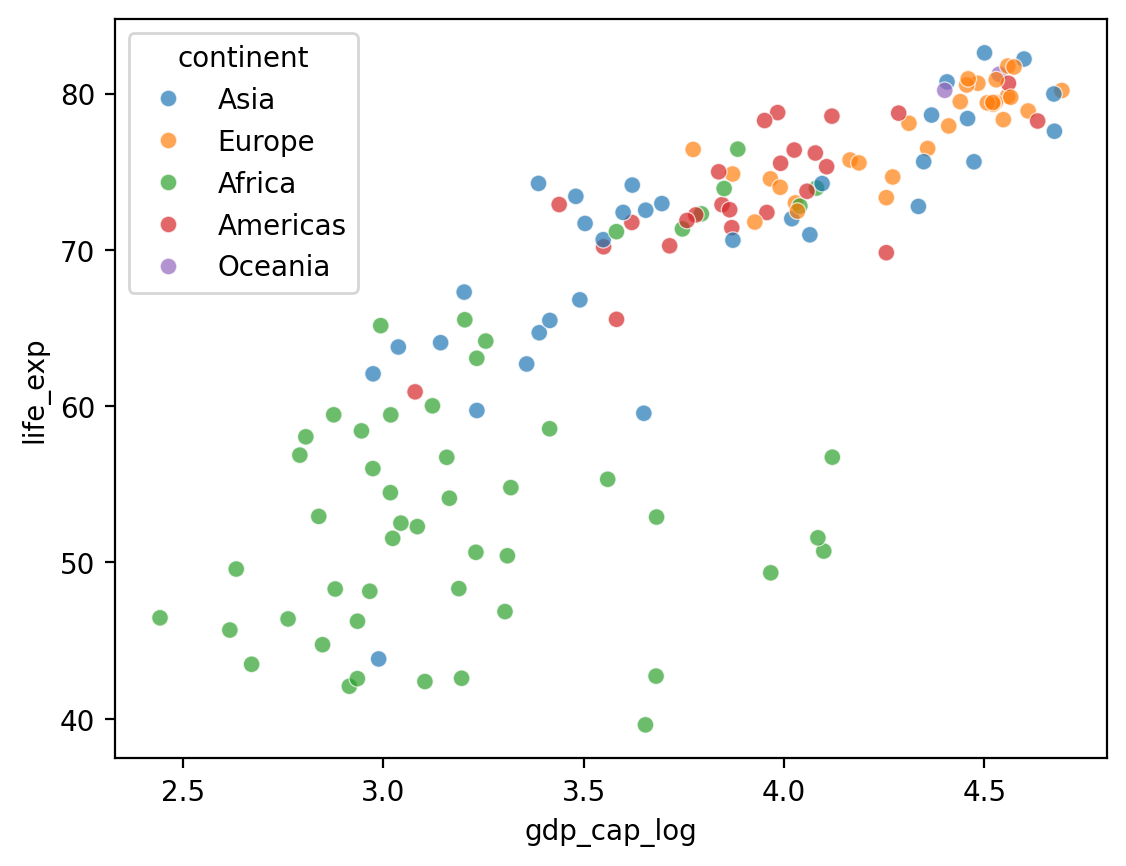

In [13]:
## Log GDP
df_gapminder['gdp_cap_log'] = np.log10(df_gapminder['gdp_cap']) 
## Pokaz log GDP z life exp
sns.scatterplot(data = df_gapminder[df_gapminder['year'] == 2007],
               x = 'gdp_cap_log', y = 'life_exp', hue = "continent", alpha = .7);

#### Dodajemy `size`

- Co jeśli chcemy dodać *czwarty* komponent, który jest ciągły, jak `population`?
- `seaborn` pozwala nam to zrobić z `size` - powstanie wykres bąbelkowy!

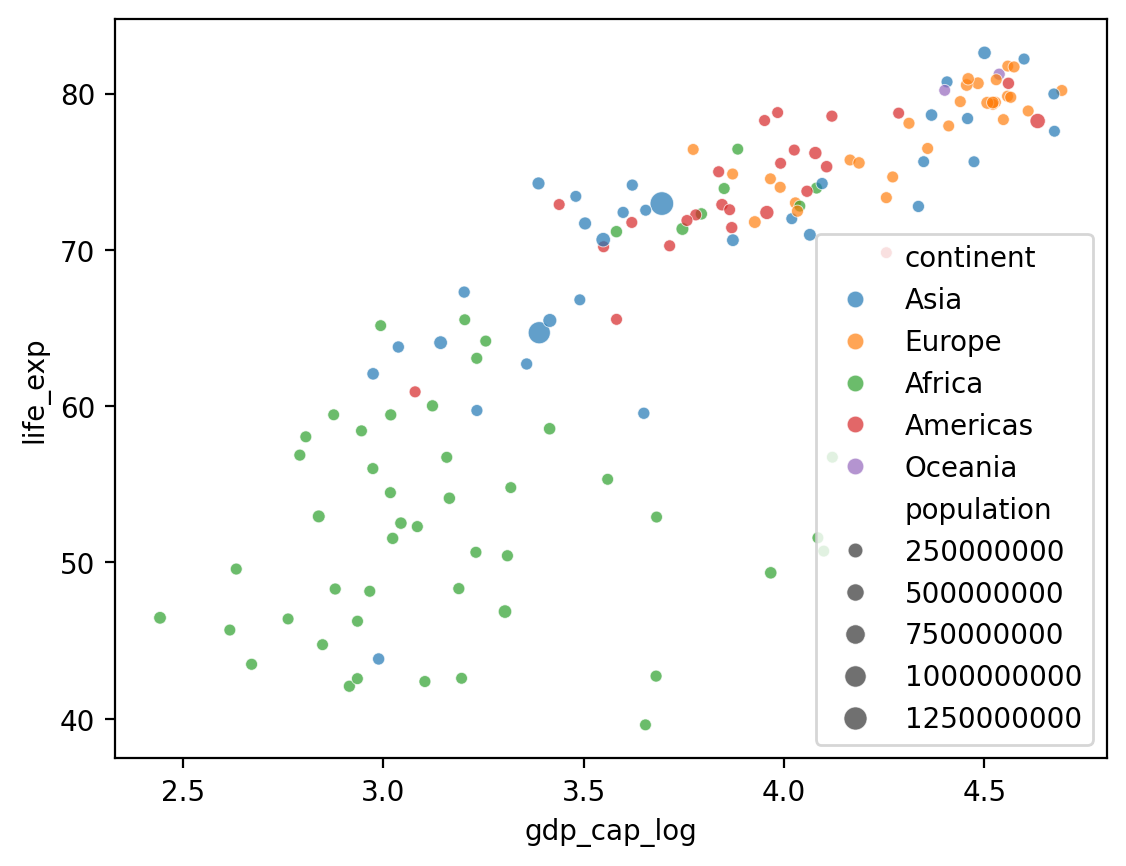

In [14]:
## Log GDP
df_gapminder['gdp_cap_log'] = np.log10(df_gapminder['gdp_cap']) 
## Pokaz log GDP z life exp
sns.scatterplot(data = df_gapminder[df_gapminder['year'] == 2007],
               x = 'gdp_cap_log', y = 'life_exp',
                hue = "continent", size = 'population', alpha = .7);

#### Zmiany w pozycji legendy

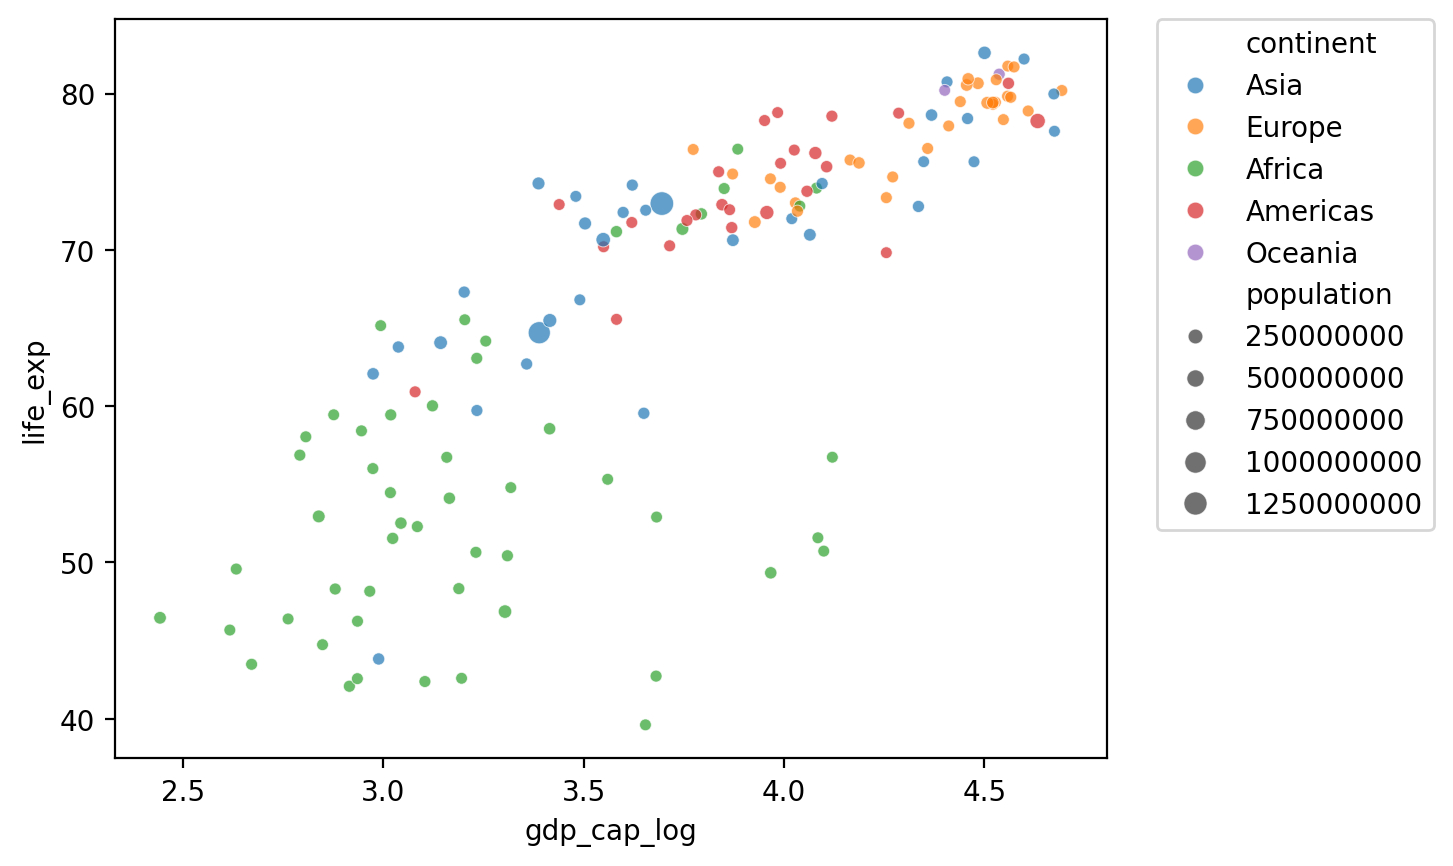

In [15]:
## Pokaz log GDP z life exp
sns.scatterplot(data = df_gapminder[df_gapminder['year'] == 2007],
               x = 'gdp_cap_log', y = 'life_exp',
                hue = "continent", size = 'population', alpha = .7)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

### Wykres liniowy z `sns.lineplot`

> **Wykres liniowy** równiez wizualizuje związek między dwiema zmiennymi ciągłymi.

- Zazwyczaj pozycja linii na osi `y` odzwierciedla *średnią* zmiennej na osi `y` dla tej wartości `x`.
- Często używany do wykreślania **zmian w czasie**.

Jednym ze sposobów na stworzenie wykresu liniowego w `seaborn` jest użycie [`sns.lineplot`](https://seaborn.pydata.org/generated/seaborn.lineplot.html).

#### Wykres `life_exp` oraz `year`

Jaki ogólny trend zauważamy?

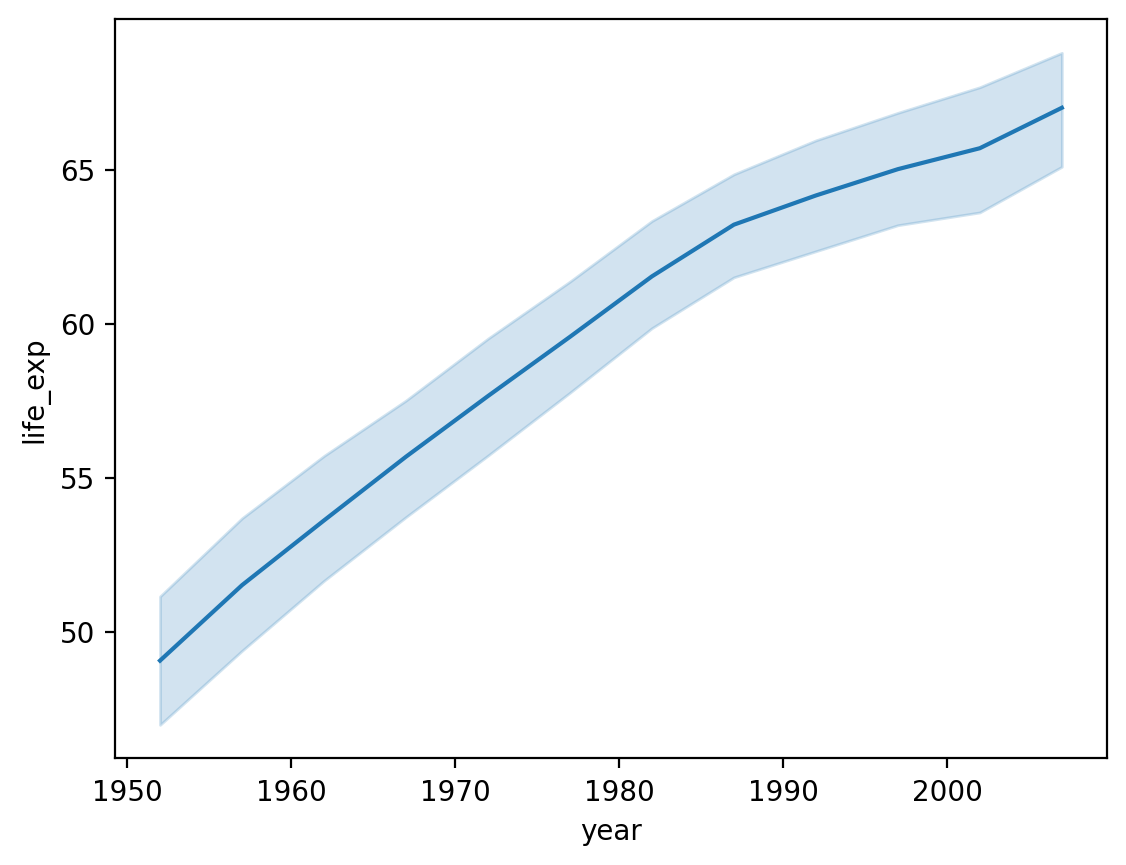

In [16]:
sns.lineplot(data = df_gapminder,
             x = 'year',
             y = 'life_exp');

#### Modyfikowanie sposobu wyświetlania błędów/niepewności

- Domyślnie, `seaborn.lineplot` rysuje **cieniowanie** wokół linii reprezentującej przedział ufności.
- Możemy to zmienić za pomocą `errstyle`.

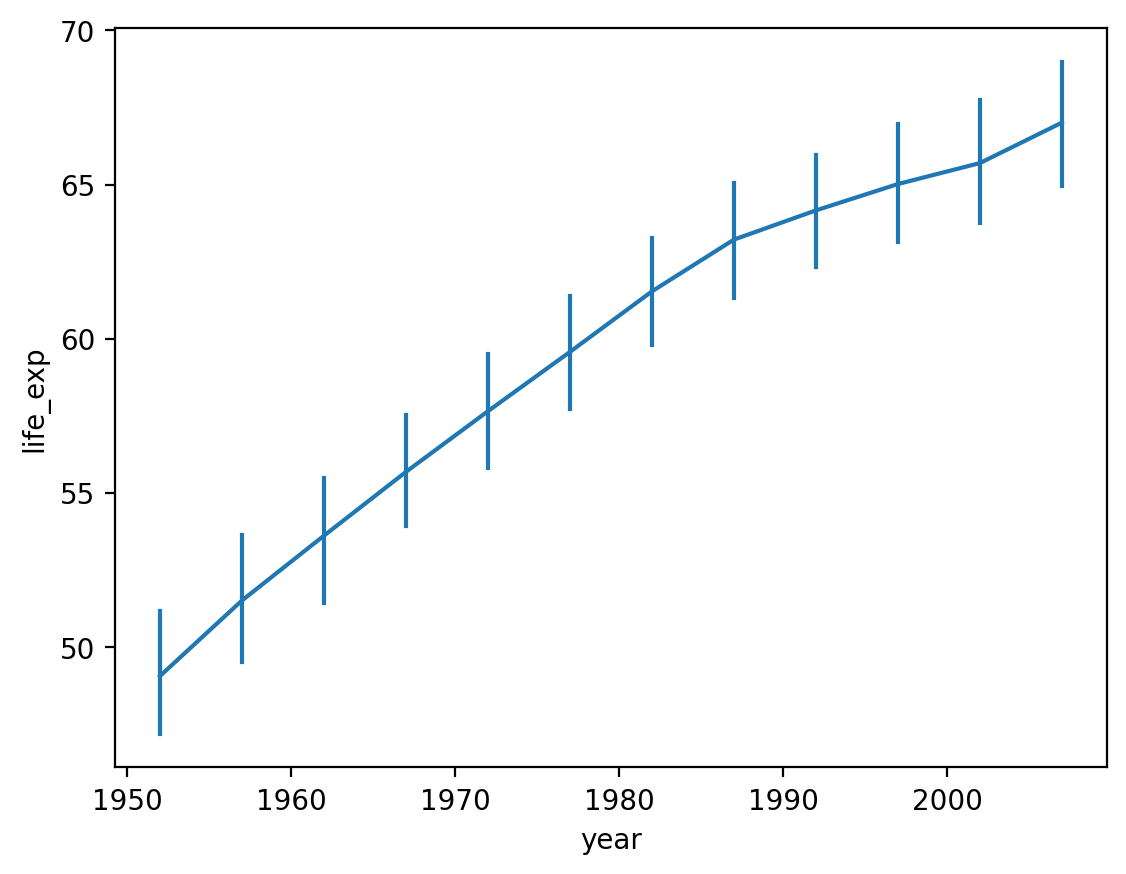

In [17]:
sns.lineplot(data = df_gapminder,
             x = 'year',
             y = 'life_exp',
            err_style = "bars");

#### Dodawanie `hue`

- Moglibyśmy również pokazać to według `kontynentów`.  
- Istnieje (na szczęście) pozytywna linia trendu dla każdego `kontynentu`.

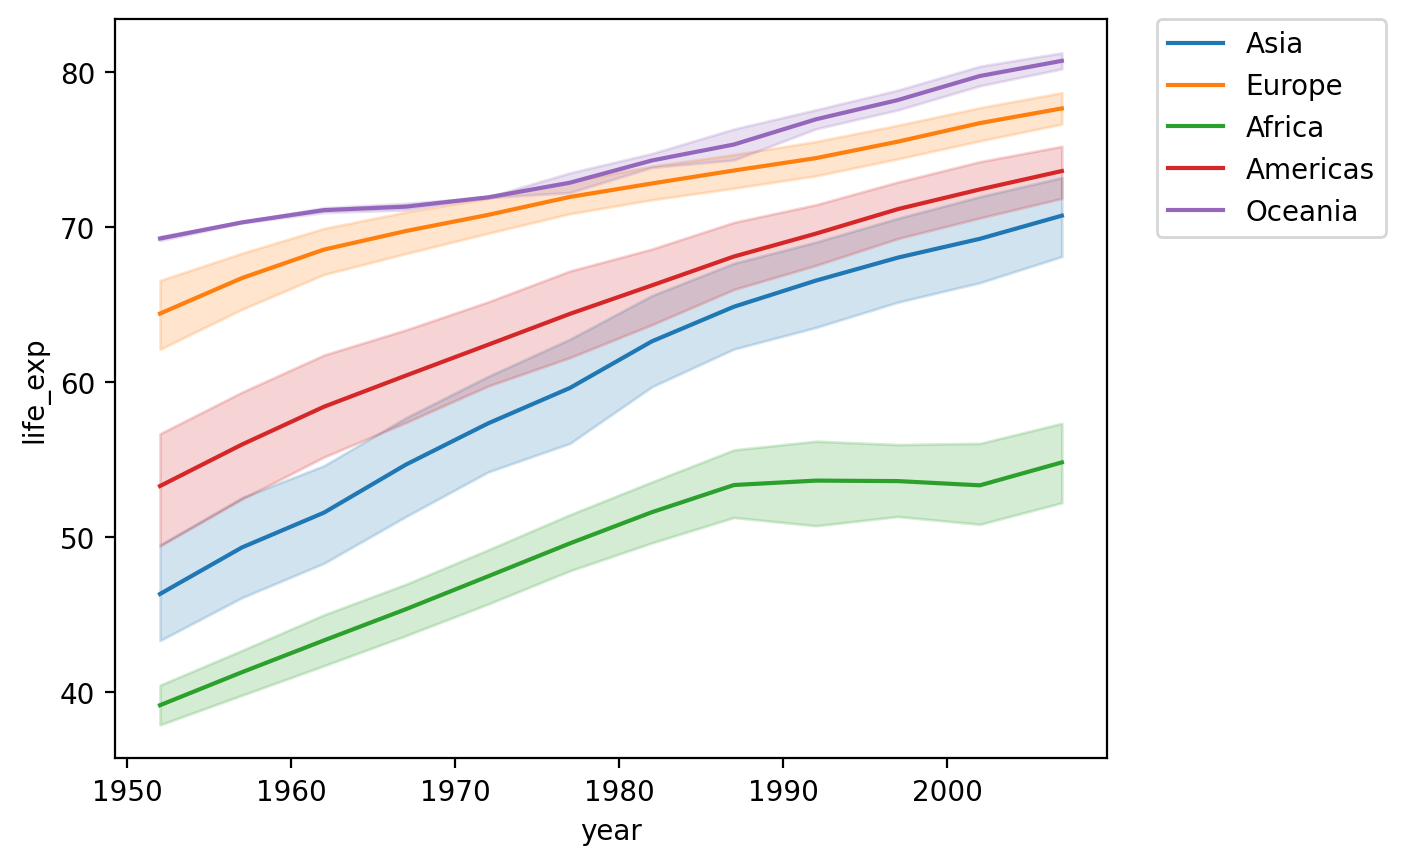

In [70]:
sns.lineplot(data = df_gapminder,
             x = 'year',
             y = 'life_exp',
            hue = "continent")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

#### Sprawdź się!

Jak wykreślić zależność między `year` i `gdp_cap` tylko dla krajów w obu Amerykach?

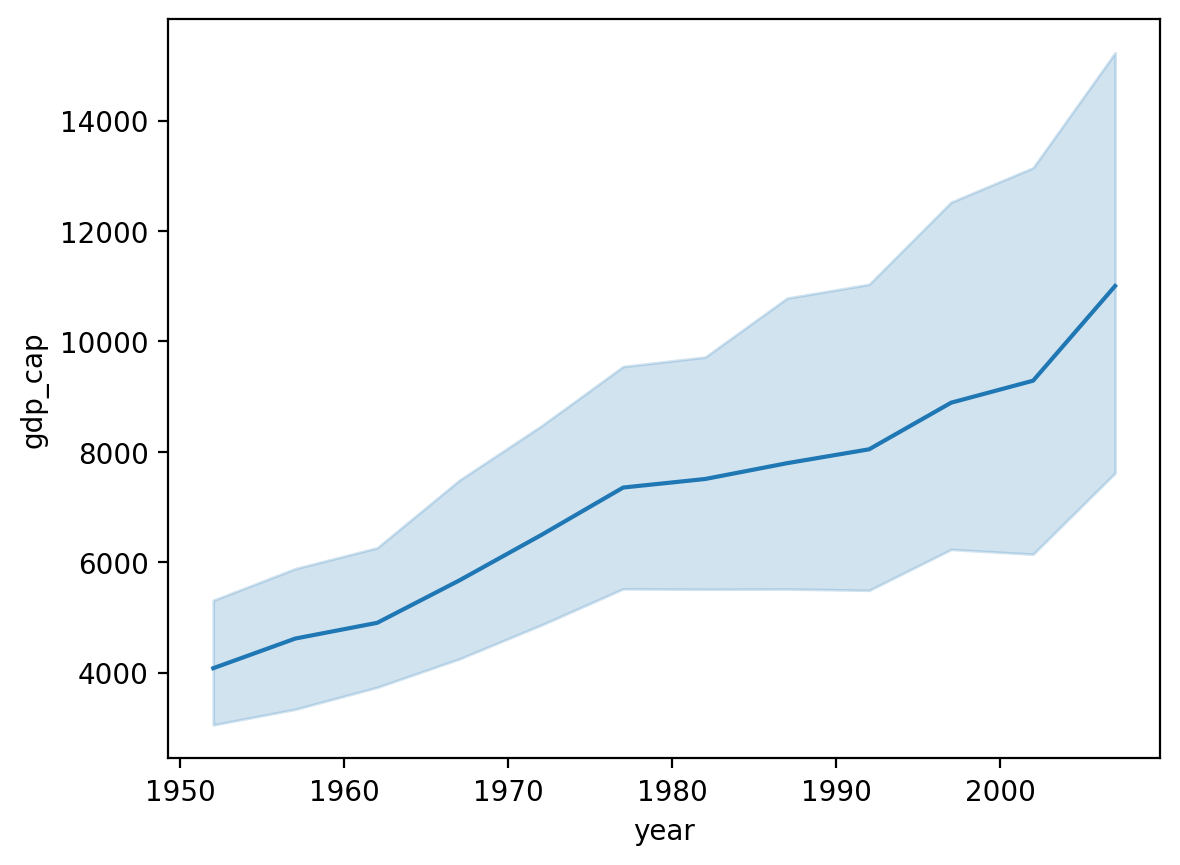

In [85]:
df_gapminder.head(250)
sns.lineplot(data = df_gapminder[df_gapminder['continent']=="Americas"],
             x = 'year', y = 'gdp_cap');
# sns.lineplot(data = df_gapminder[df_gapminder['country'].isin(["Canada", "United States"])],
#              x = 'year', y = 'gdp_cap', hue='country');
# plt.legend(loc='upper left', borderaxespad=0)

#### Heteroskedastyczność w `gdp_cap` według `roku`

- [**Heteroskedastyczność**](https://en.wikipedia.org/wiki/Homoscedasticity_and_heteroscedasticity) to sytuacja, w której *zmienność* jednej zmiennej (np. `gdp_cap`) zmienia się w funkcji innej zmiennej (np. `roku`).
- Jak myślisz, dlaczego tak jest w tym przypadku?

#### Rysowanie według kraju

- Jest zbyt wiele krajów, aby wyraźnie wyświetlić je w `legendzie`. 
- Ale dwie górne linie to „Stany Zjednoczone” i „Kanada”.
   - Oznacza to, że dwa kraje stały się znacznie bogatsze w przeliczeniu na mieszkańca, podczas gdy inne nie odnotowały takiego samego wzrostu gospodarczego.

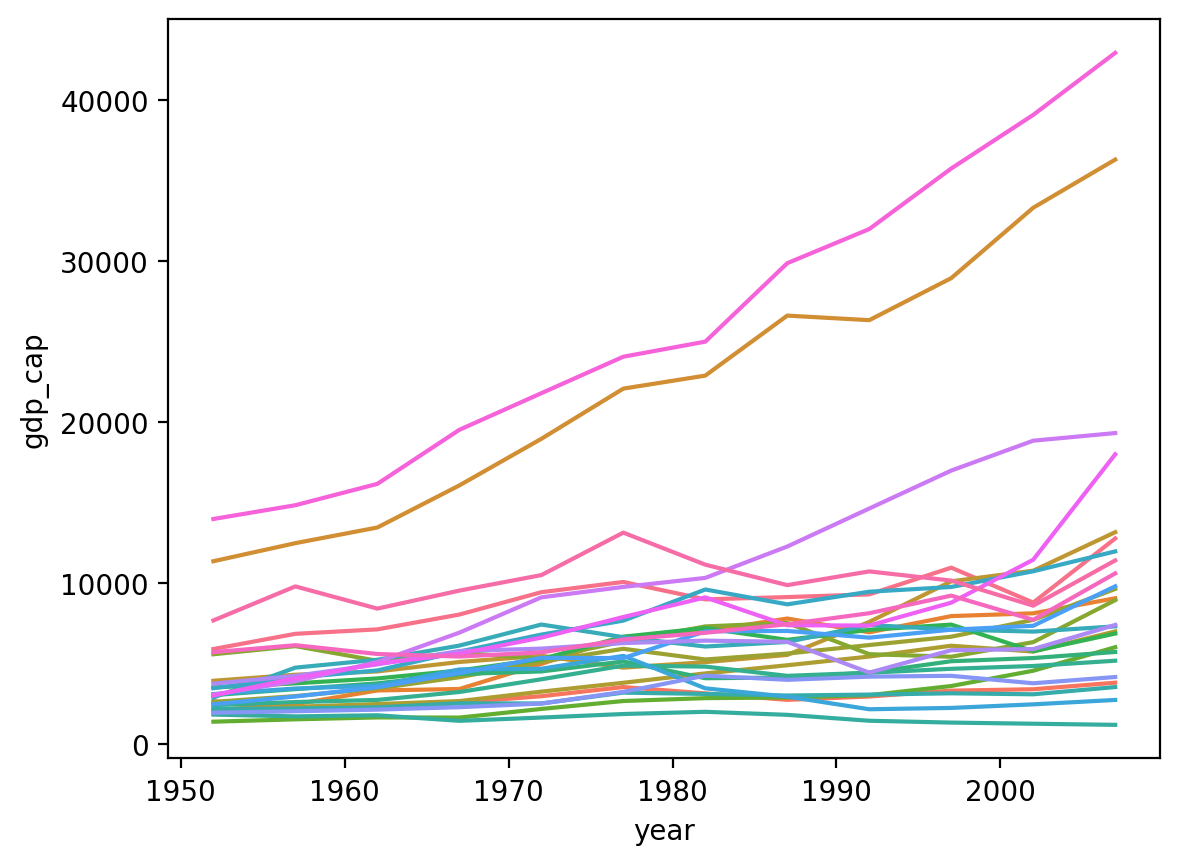

In [20]:
sns.lineplot(data = df_gapminder[df_gapminder['continent']=="Americas"],
             x = 'year', y = 'gdp_cap', hue = "country", legend = None);

### Wykorzystanie `relplot`

- `relplot` pozwala na tworzenie wykresów liniowych lub wykresów rozproszonych przy użyciu `kind`.
- `relplot` ułatwia również `facet` (który omówimy za chwilę).

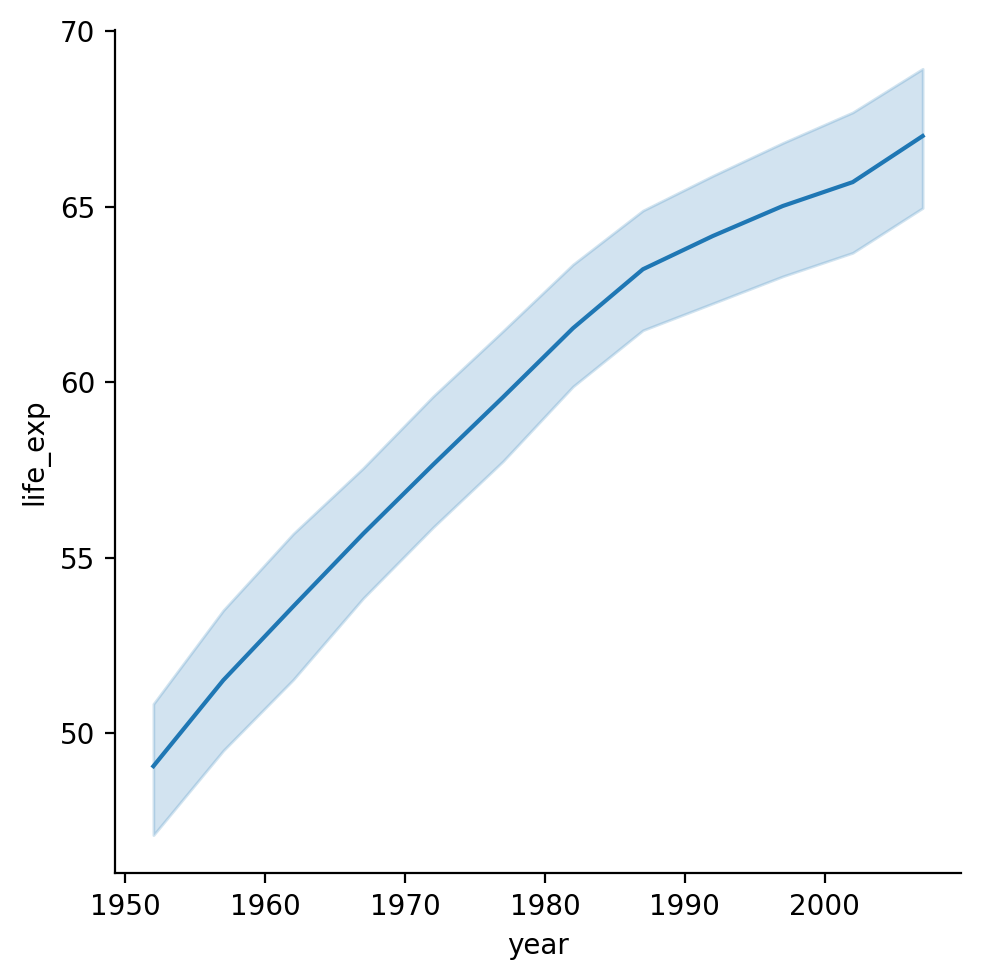

In [90]:
sns.relplot(data = df_gapminder, x = "year", y = "life_exp", kind = "line");

#### Grupowanie grafik w `wiersze` i `kolumny`

Możemy również wykreślić tę samą relację w wielu „oknach” lub **facetach**, dodając parametr `rows`/`cols`.

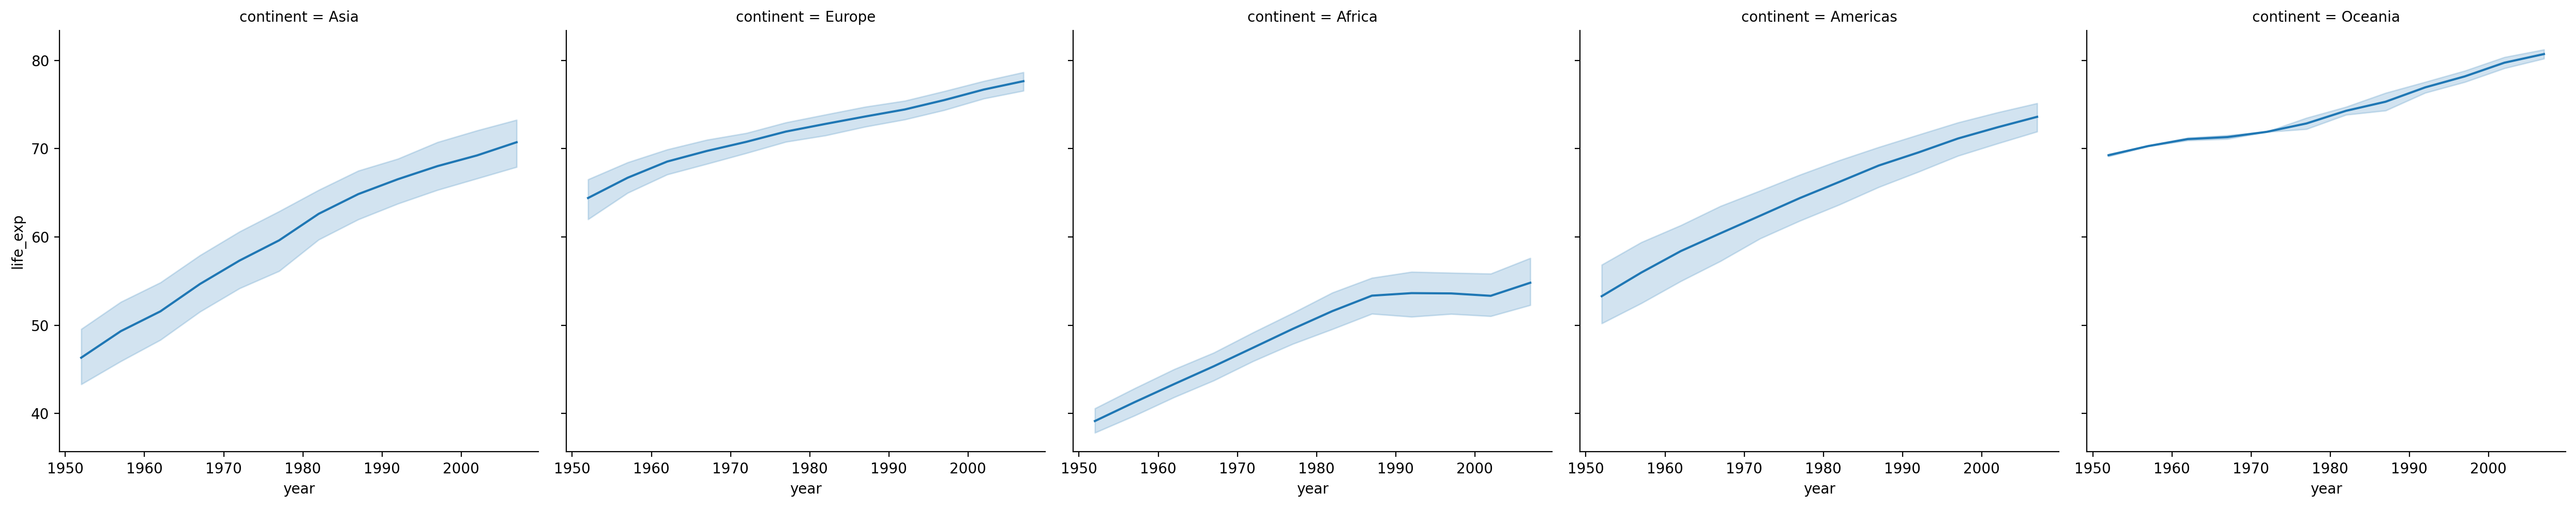

In [22]:
sns.relplot(data = df_gapminder, x = "year", y = "life_exp", kind = "line", col = "continent");

## Bivariate categorical plots

> A **bivariate categorical plot** visualizes the relationship between one categorical variable and one continuous variable.

![title](img/seaborn_catplot.png)

### Przykładowe dane

W tym miejscu powrócimy do naszego zbioru danych Pokemon, który zawiera więcej przykładów zmiennych kategorialnych.

In [91]:
df_pokemon = pd.read_csv("data/pokemon.csv")

### Wykresy słupkowe `sns.barplot`

> ***Wykres słupkowy*** wizualizuje związek pomiędzy jedną *zmienną ciągłą* a *zmienną kategorialną*.

- *Wysokość* każdego słupka zazwyczaj wskazuje średnią zmiennej ciągłej.
- Każdy słupek reprezentuje inny *poziom* zmiennej kategorialnej.

Z `seaborn`, możemy użyć funkcji `sns.barplot`.

#### Średni `Attack` według statusu `Legendary`

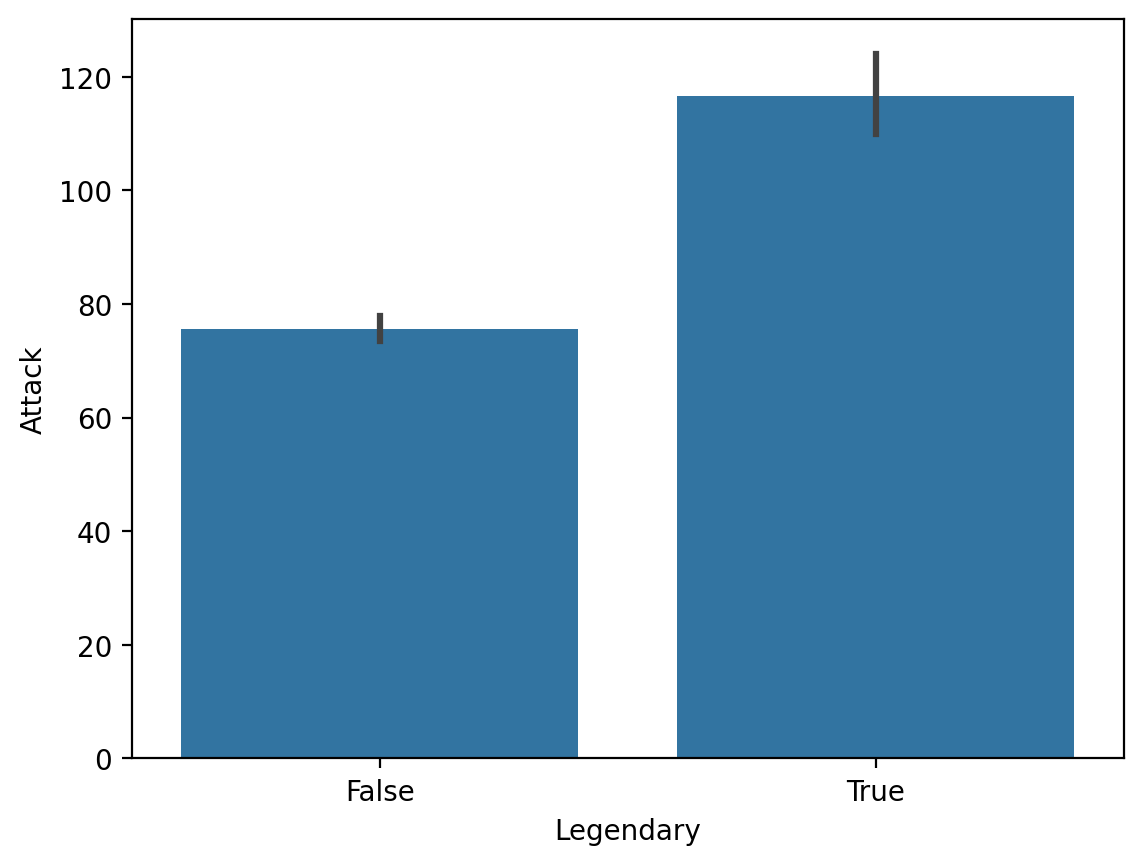

In [24]:
sns.barplot(data = df_pokemon,
           x = "Legendary", y = "Attack");

#### Średni `Attack` według `Type 1`

Zauważ, że rysunek jest *większy*, aby upewnić się, że wszystkie etykiety pasują.

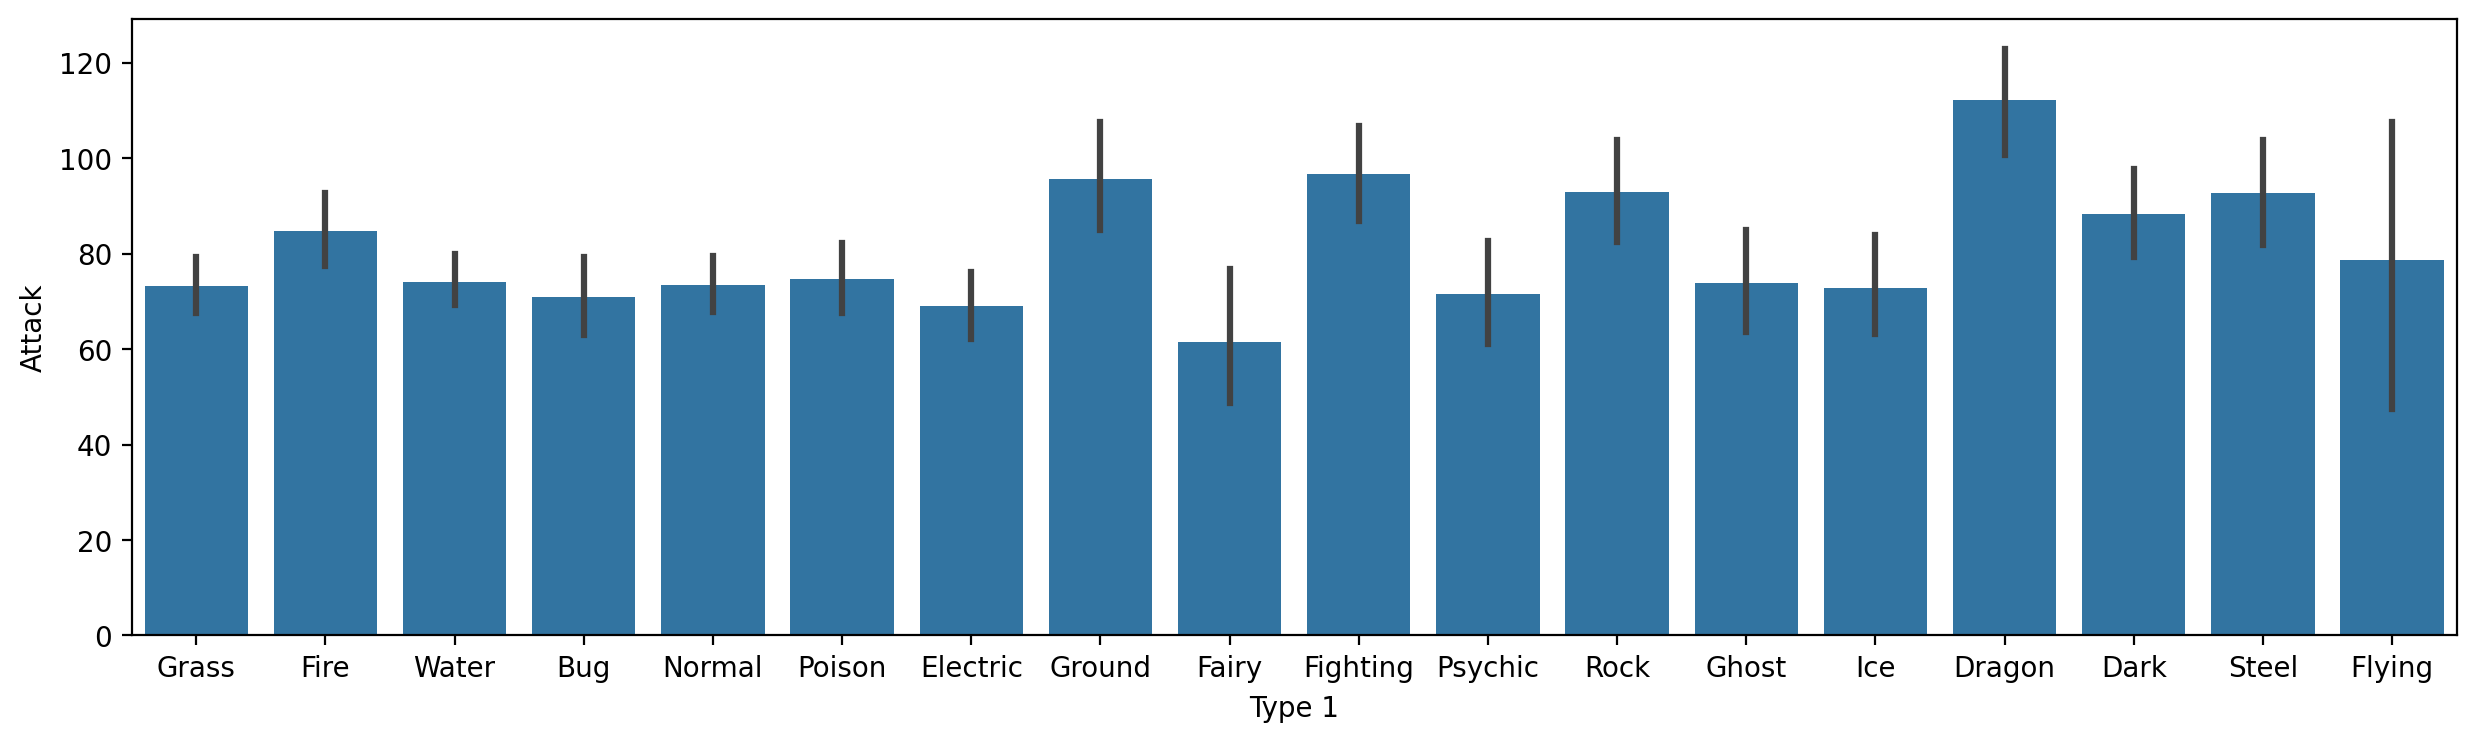

In [25]:
plt.figure(figsize=(15,4))
sns.barplot(data = df_pokemon,
           x = "Type 1", y = "Attack");

#### Sprawdź się

Jak wykreślić `HP` według `Type 1`?

In [26]:
### Twój kod tutaj

#### Modyfikowanie `hue`

Podobnie jak w przypadku `wykresu rozrzutu` i `liniowego`, możemy zmienić `hue`, aby uzyskać większą przejrzystość.

- Na przykład, `HP` przez `Type 1`, dalej podzielone przez status `Legendary`.

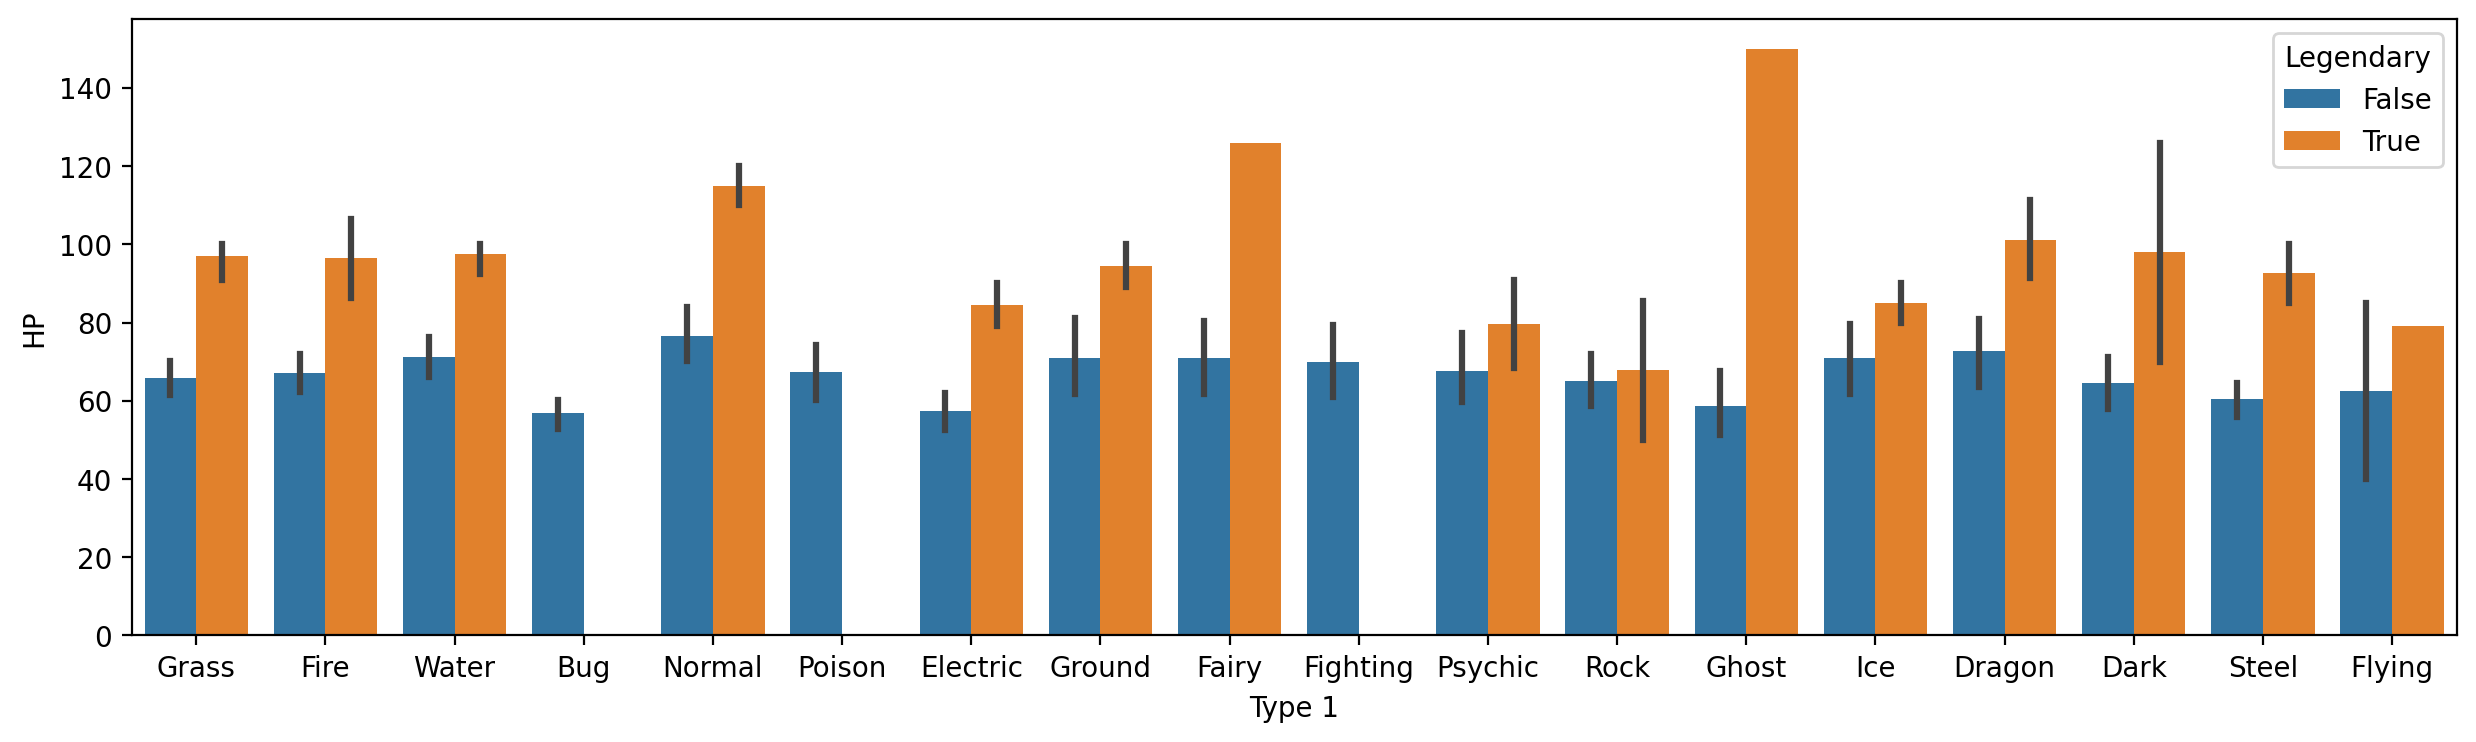

In [27]:
plt.figure(figsize=(15,4))
sns.barplot(data = df_pokemon,
           x = "Type 1", y = "HP", hue = "Legendary");

### Wykorzystanie `catplot`

> `seaborn.catplot` jest wygodną funkcją do wykreślania dwuwymiarowych danych kategorycznych przy użyciu szeregu typów wykresów (`bar`, `box`, `strip`).

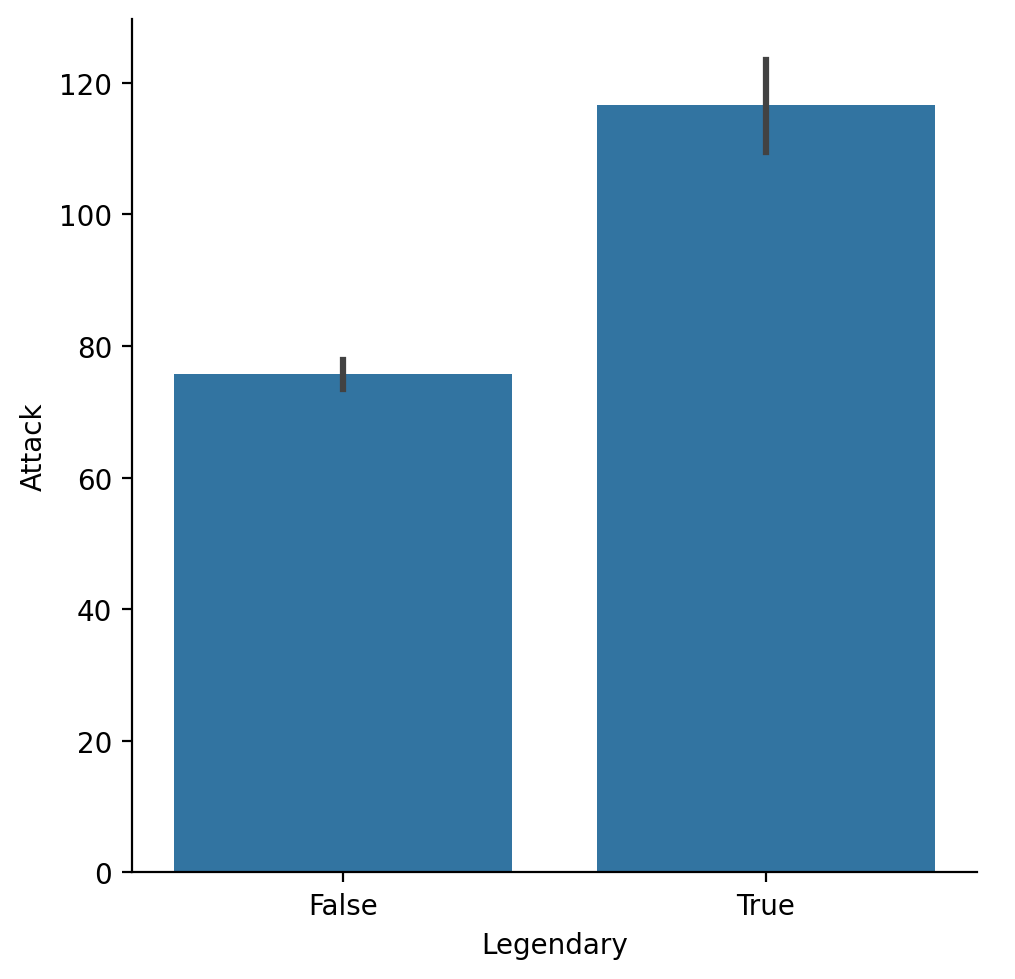

In [28]:
sns.catplot(data = df_pokemon, x = "Legendary", 
             y = "Attack", kind = "bar");

#### Wykresy paskowe

> Wykres **paskowy** pokazuje każdy pojedynczy punkt (jak scatterplot), podzielony przez **etykietę kategorii**.

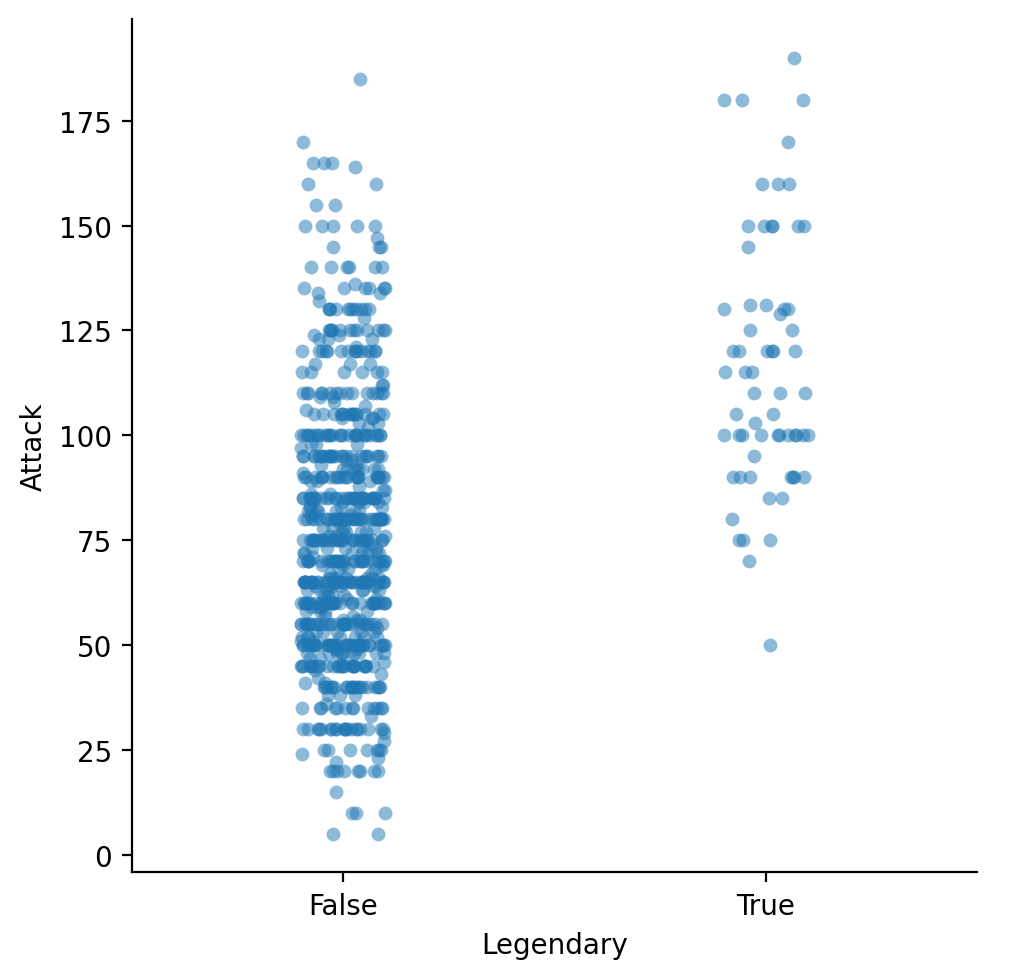

In [29]:
sns.catplot(data = df_pokemon, x = "Legendary", 
             y = "Attack", kind = "strip", alpha = .5);

#### Dodanie `średniej` do wykresu `paskowego`

Możemy wykreślić *dwa wykresy* w tym samym czasie, pokazując zarówno poszczególne punkty, jak i średnie.

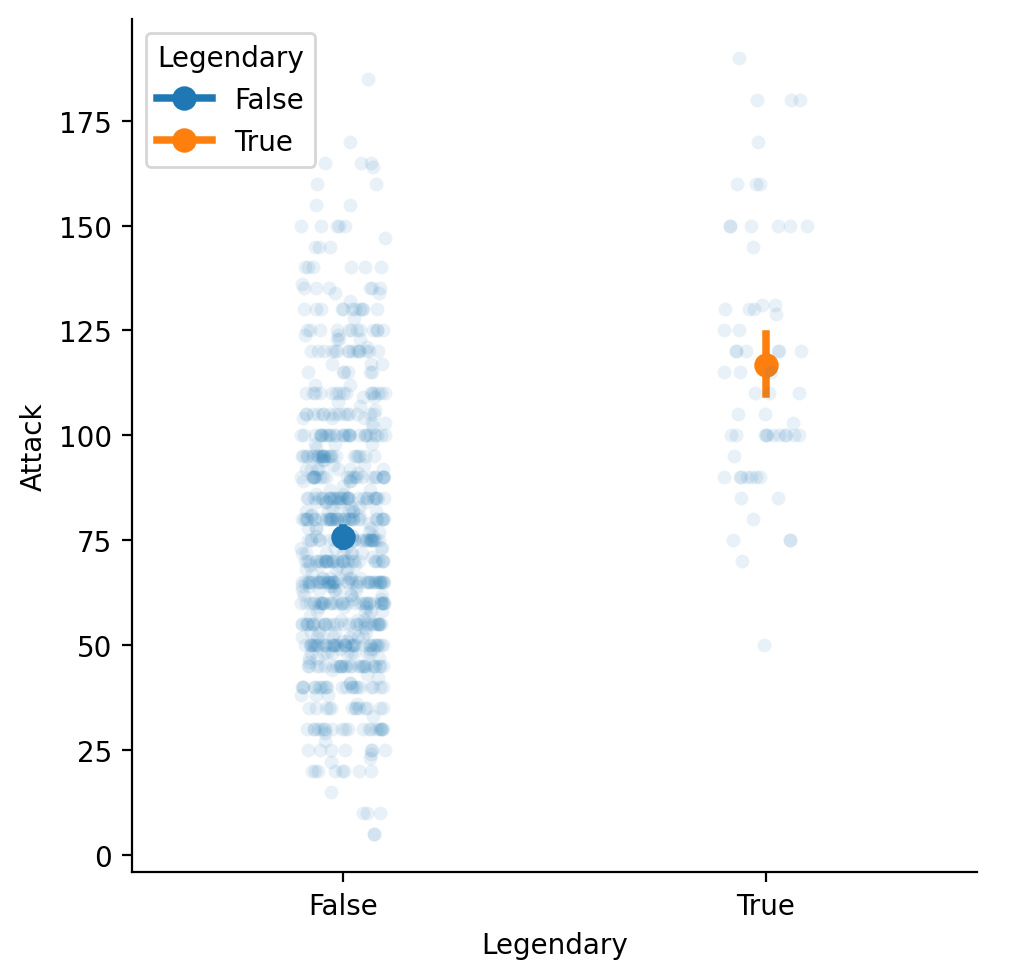

In [30]:
sns.catplot(data = df_pokemon, x = "Legendary", 
             y = "Attack", kind = "strip", alpha = .1);
sns.pointplot(data = df_pokemon, x = "Legendary", 
             y = "Attack", hue = "Legendary");

#### Wykresy `pudełkowe`

> Wykres **pudełkowy** pokazuje zakres międzykwartylowy (środkowe 50% danych), wraz z minimum i maksimum.

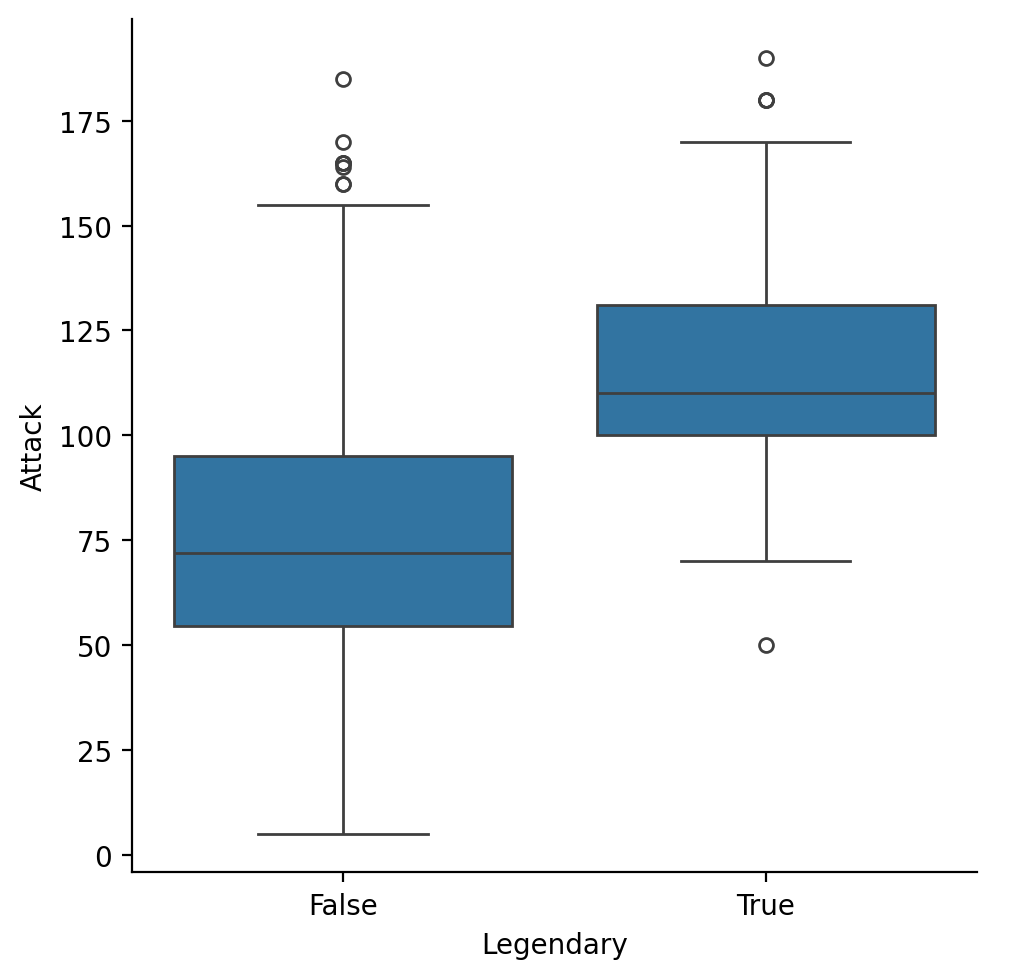

In [31]:
sns.catplot(data = df_pokemon, x = "Legendary", 
             y = "Attack", kind = "box");

Mozna łatwo oczywiście wykreślić jedną zmienną i jej wykres pudełkowy:

In [32]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


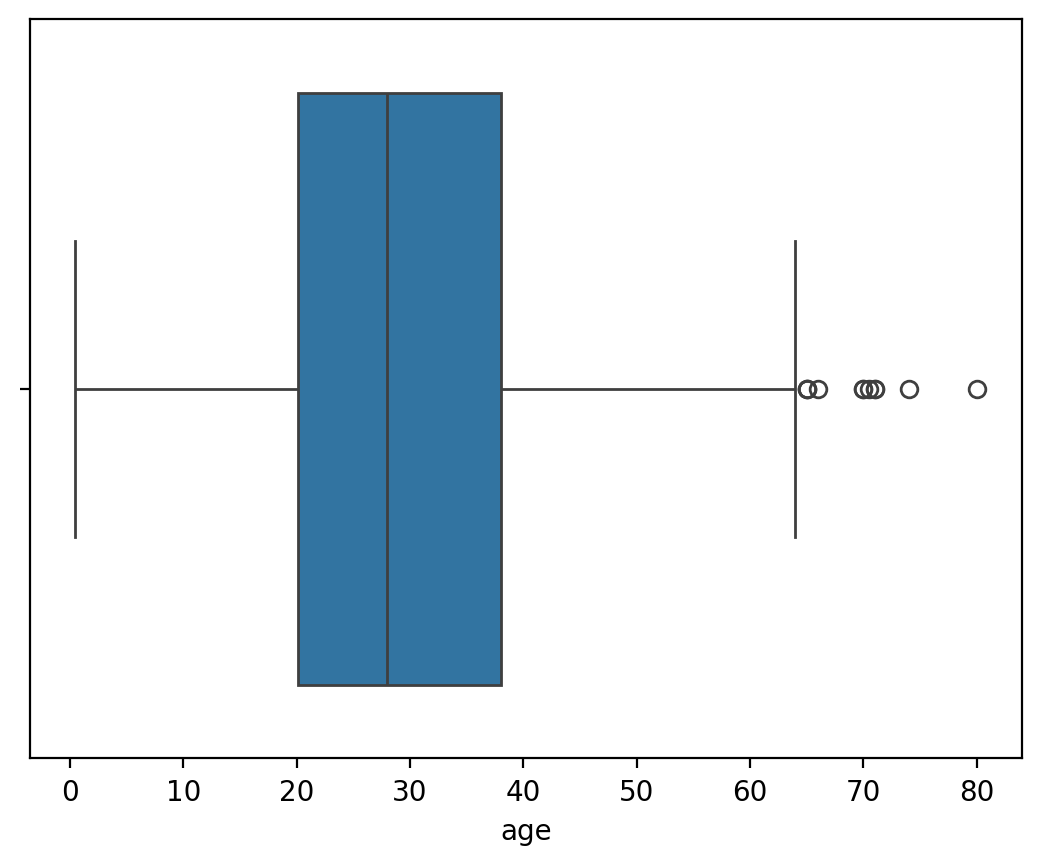

In [33]:
sns.boxplot(x=titanic["age"]);

Pogrupujemy teraz boxplot według zmiennej kategorialnej, odwołując się do kolumn w ramce danych:

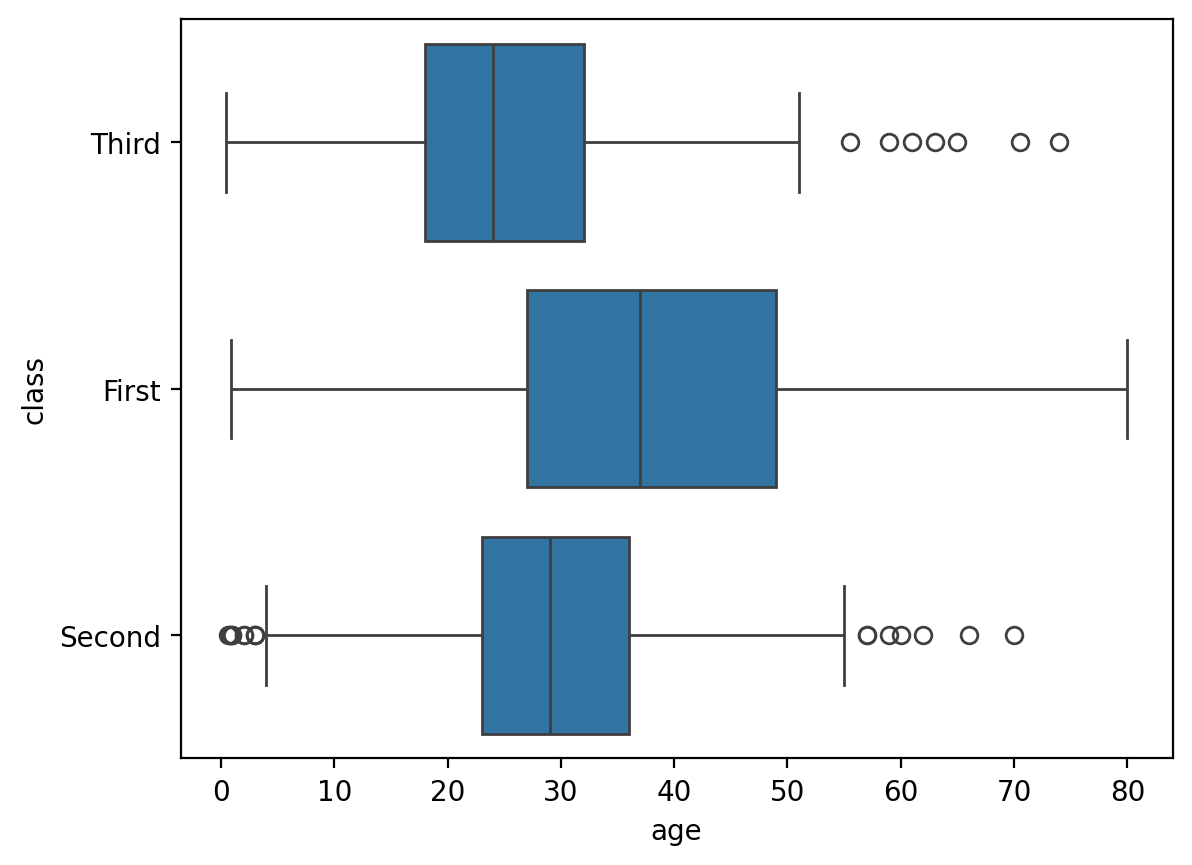

In [34]:
sns.boxplot(data=titanic, x="age", y="class");

Narysujmy pionowy wykres pudełkowy z zagnieżdżonym grupowaniem według dwóch zmiennych:

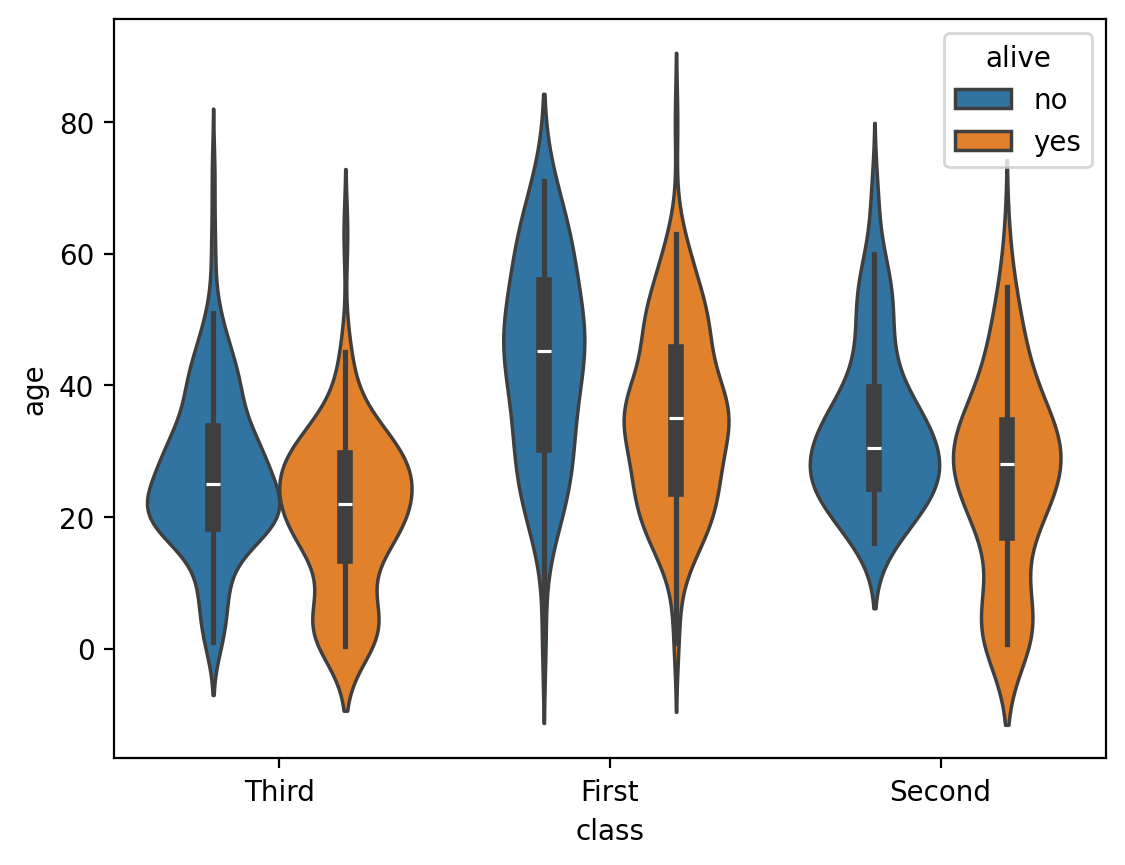

In [94]:
sns.violinplot(data=titanic, x="class", y="age", hue="alive");
# sns.violinplot(data=titanic)

Zobacz takze, jak narysować wykresy wiolinowe, wykresy tzw. roju (podobne do paskowego) - więcej informacji [tutaj](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

## Podsumowanie

Były to dwa rozdziały o wizualizacji danych na początek - absolutne minimum, aby zacząć wykonywać eksploracyjną analizę danych.

W szczególności, w tym rozdziale było to wprowadzenie do:

- Pakietu `seaborn`.
- Wykreślania danych **jednowymiarowych** i **różnowymiarowych**.
- Tworzenia wykresów z wieloma warstwami.